In [17]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

In [18]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

In [19]:
origin=load_data('traffic_acc')
origin.head()

[data] https://data.hossam.kr/data/lab04/traffic_acc.xlsx
[desc] 2005년 1월 부터 2018년 12월 까지 월별 교통사고의 발생건수,부상자수,사망자수 데이터(인덱스/메타데이터 없음, 출처: 공공데이터포털)
[!] Cannot read metadata


,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808


In [20]:
df=origin.drop('월', axis=1).groupby('년도').mean()
df

,발생건수,사망자수,부상자수
년도,,,
2005,17847.583333,531.333333,28519.416667
2006,17812.083333,527.250000,28352.416667
2007,17638.500000,513.833333,27992.166667
2008,17985.166667,489.166667,28246.833333
2009,19332.500000,486.500000,30156.250000
2010,18906.500000,458.750000,29371.500000
2011,18475.916667,435.750000,28449.250000
2012,18638.000000,449.333333,28713.750000
2013,17946.166667,424.333333,27392.583333


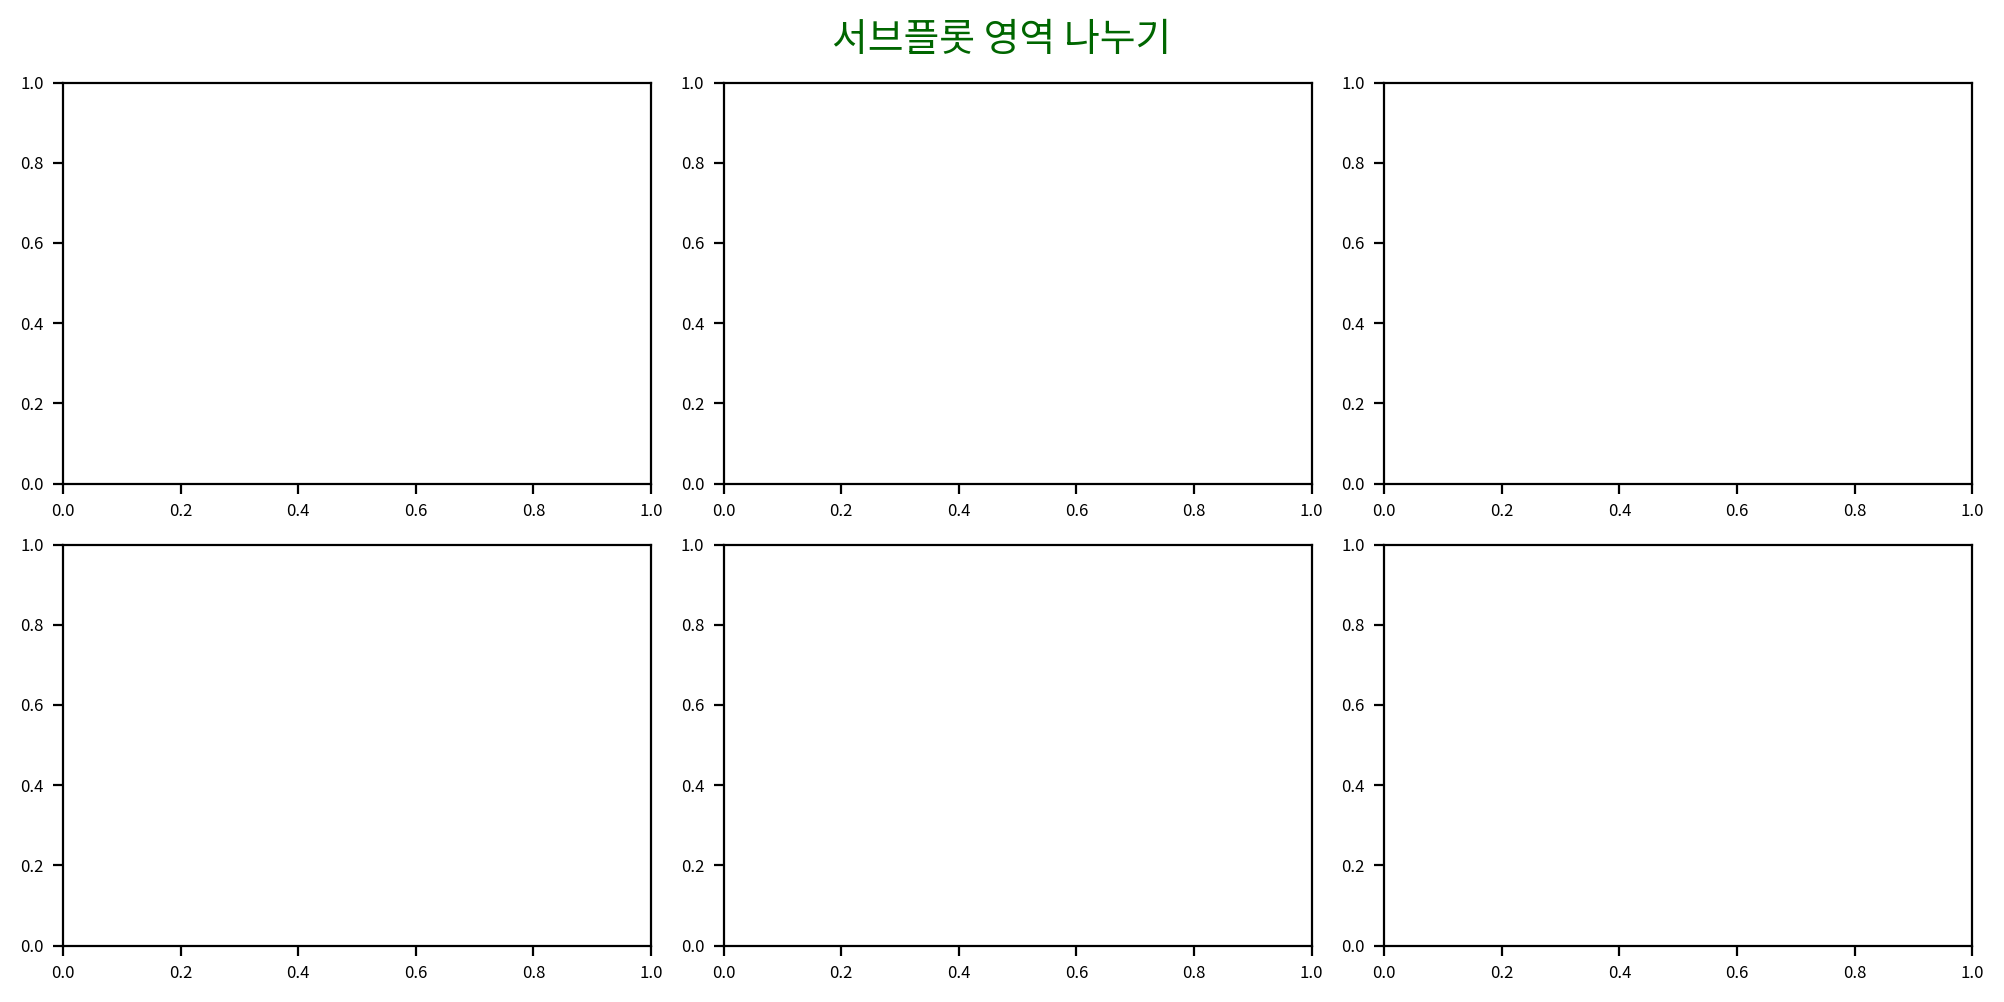

In [21]:
# 1. 그래프 초기화
width_px=2000
height_px=1000
rows=2
cols=3
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기

# 3. 그래프 꾸미기
fig.suptitle('서브플롯 영역 나누기',fontsize=14,color='#006600')
fig.subplots_adjust(wspace=0.2, hspace=0.2)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

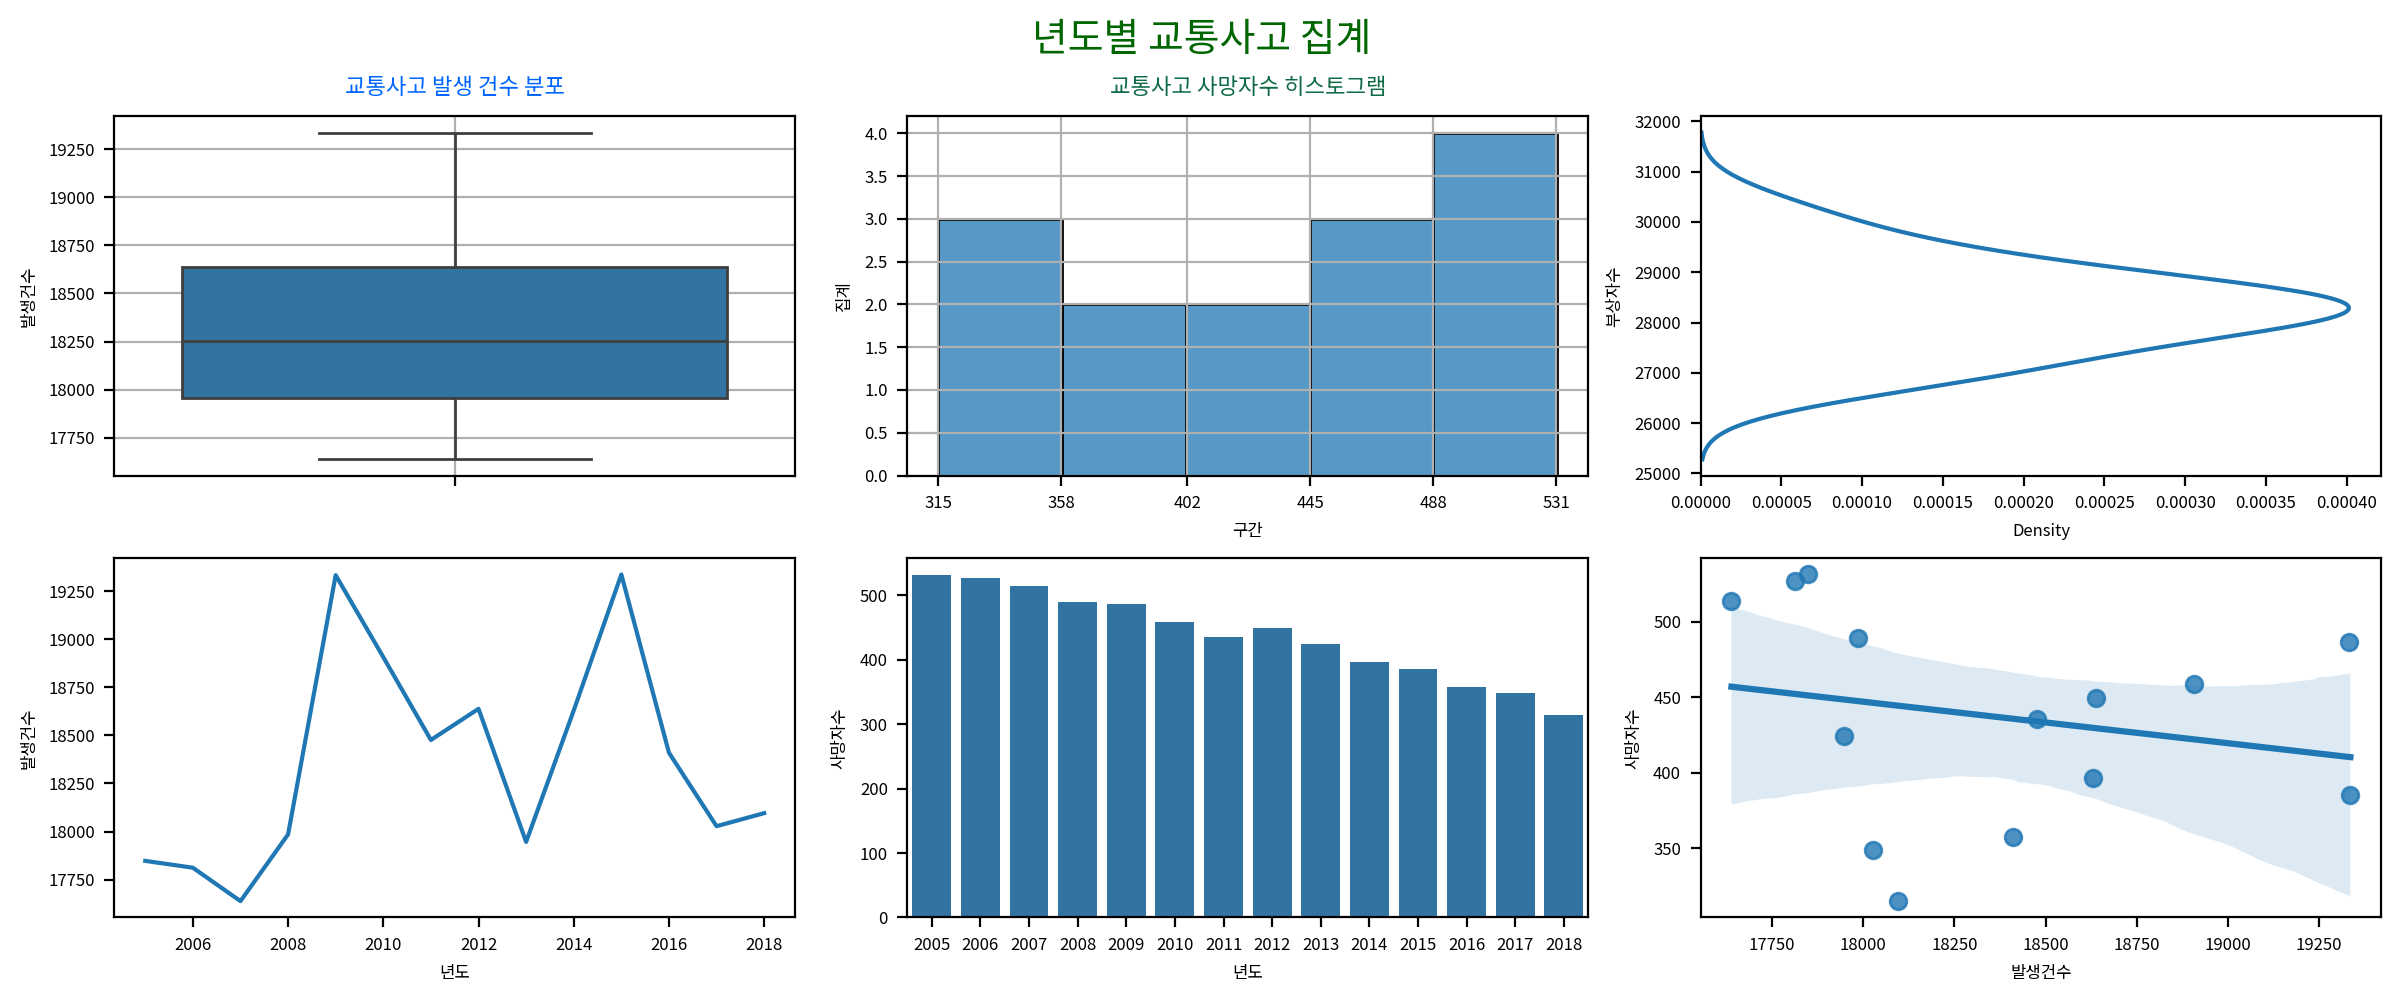

In [25]:
# 1. 그래프 초기화
width_px=2400
height_px=1000
rows=2
cols=3
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.boxplot(data=df, y='발생건수', ax=ax[0][0])
sb.histplot(data=df, x='사망자수', bins=5, ax=ax[0][1])
sb.kdeplot(data=df, y='부상자수', ax=ax[0][2])
sb.lineplot(data=df, x=df.index, y='발생건수', ax=ax[1][0])
sb.barplot(data=df, x=df.index, y='사망자수', estimator=np.sum, ax=ax[1][1])
sb.regplot(data=df, x='발생건수', y='사망자수', ax=ax[1][2])

# 3. 그래프 꾸미기
fig.suptitle('년도별 교통사고 집계',fontsize=14,color='#006600')
fig.subplots_adjust(wspace=0.2, hspace=0.2)

ax[0][0].set_title('교통사고 발생 건수 분포', color='#0066ff', fontsize=8, pad=8)
ax[0][0].grid()

hist, bins=np.histogram(df['사망자수'],bins=5)
bins=bins.round().astype('int')
ax[0][1].set_title('교통사고 사망자수 히스토그램', color='#0f6a46', fontsize=8, pad=8)
ax[0][1].set_xticks(bins, bins)
ax[0][1].set_xlabel('구간')
ax[0][1].set_ylabel('집계')
ax[0][1].grid()

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

In [26]:
x=np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
y1=np.arange(10)
y1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
y2=x**2
y2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

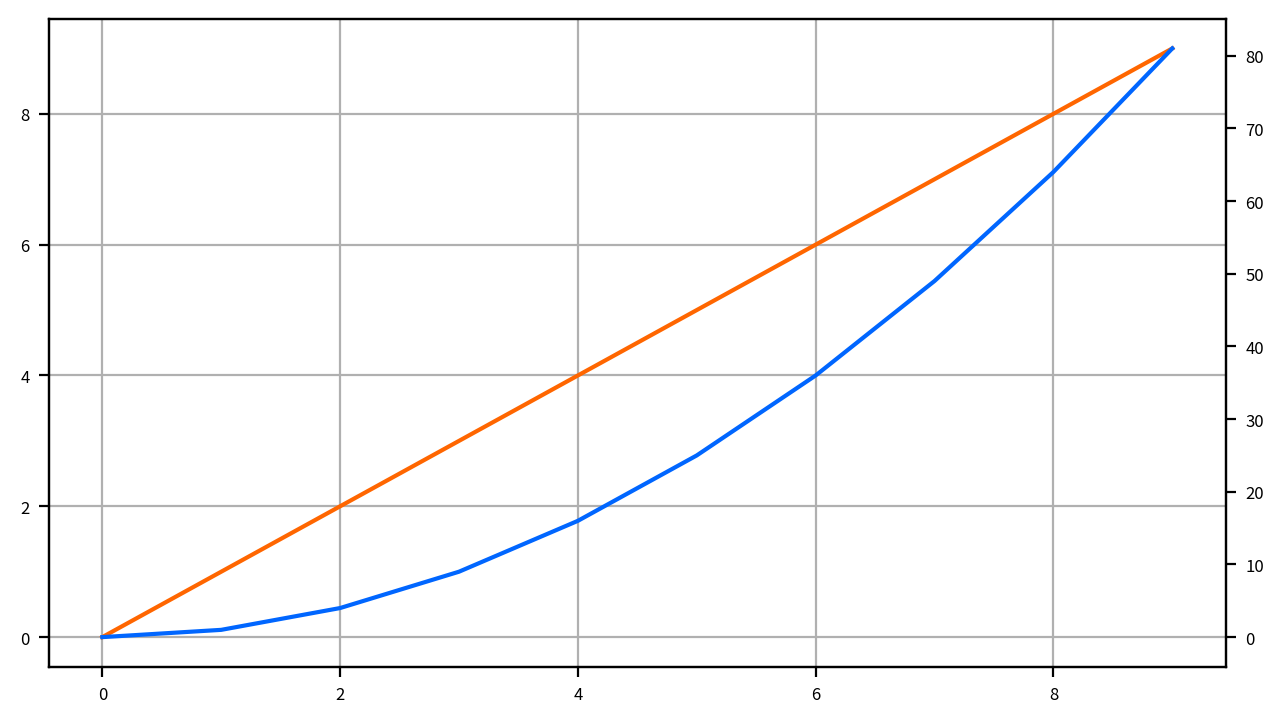

In [29]:
width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax1=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

ax2=ax1.twinx()

sb.lineplot(x=x, y=y1, color='#ff6600', ax=ax1)
sb.lineplot(x=x, y=y2, color='#0066ff', ax=ax2)

ax1.grid(True)

plt.tight_layout()
plt.show()
plt.close()

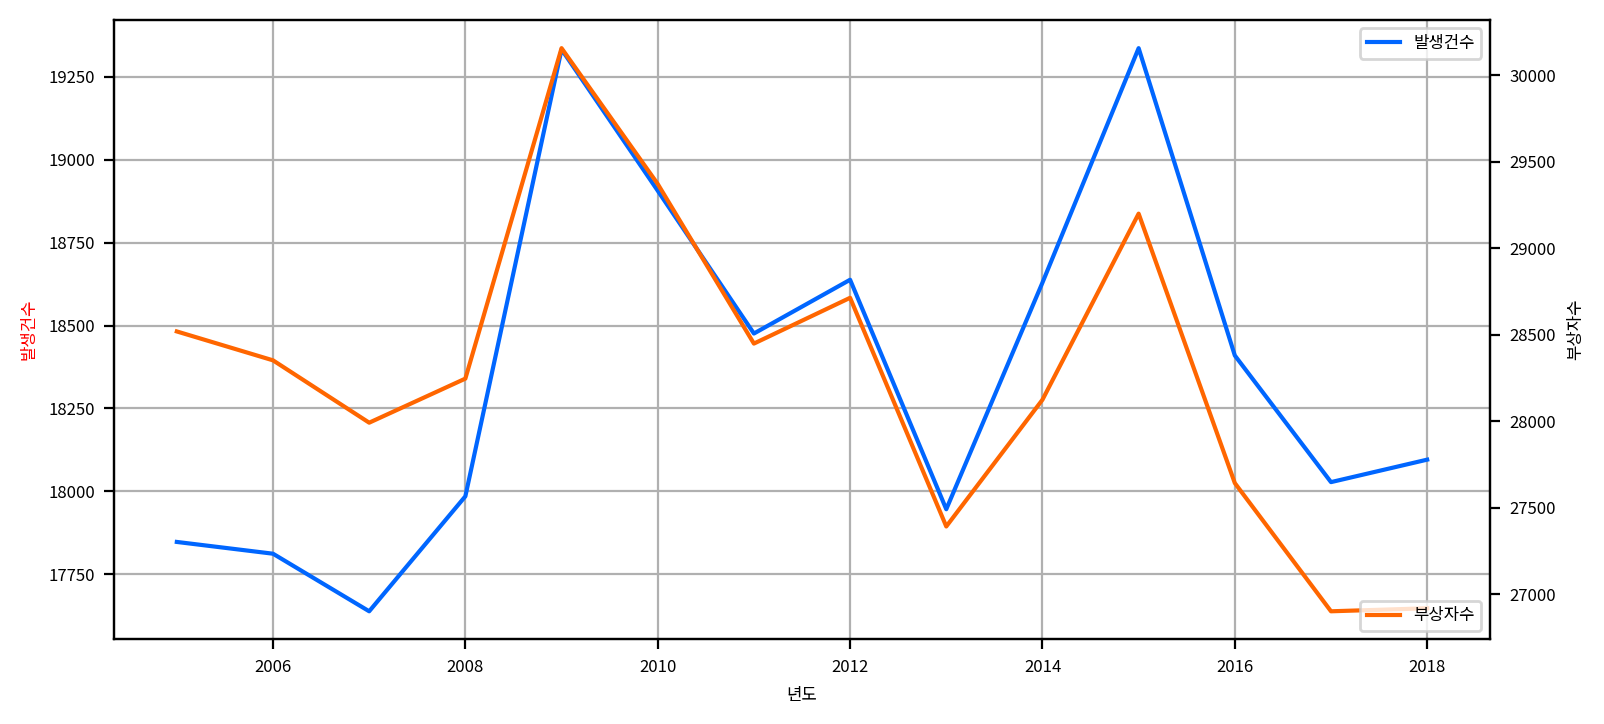

In [31]:
width_px=1600
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax1=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

ax2=ax1.twinx()

sb.lineplot(data=df, x=df.index, y='발생건수', color='#0066ff', ax=ax1, label='발생건수')
sb.lineplot(data=df, x=df.index, y='부상자수', color='#ff6600', ax=ax2, label='부상자수')

ax1.set_xlabel('년도')
ax1.set_ylabel('발생건수', color='#ff0000')
ax1.grid(True)
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()
plt.close()